In [335]:
import pandas as pd
import numpy as np

In [336]:
df = pd.read_csv("spotify_data_countries_rows.csv")

In [337]:
# There are 63 countries

In [338]:
df = df.set_index('Unnamed: 0')

In [339]:
df.index.name = 'country'

In [340]:
df.columns = df.columns.astype(int)

In [341]:
df = df[sorted(df.columns)]

In [202]:
df.to_csv("spotify_data_countries_rows_sorted.csv")

In [342]:
df_test = df.head()

In [344]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
country,,,,,,,,,,,,,,,,,,,,,
us,Señorita by Shawn Mendes,Panini by Lil Nas X,Money In The Grave (Drake ft. Rick Ross) by Drake,bad guy by Billie Eilish,Old Town Road - Remix by Lil Nas X,You Need To Calm Down by Taylor Swift,Truth Hurts by Lizzo,Ransom by Lil Tecca,Rodeo by Lil Nas X,I Don't Care (with Justin Bieber) by Ed Sheeran,...,Racks In The Middle (feat. Roddy Ricch and Hit...,No Role Modelz by J. Cole,Close To Me (with Diplo) (feat. Swae Lee) by E...,Cool by Jonas Brothers,Believer by Imagine Dragons,3 Nights by Dominic Fike,Bitchuary by Shordie Shordie,Heaven by Kane Brown,Don't Stop Believin' by Journey,Close Friends (Lil Baby & Gunna) by Lil Baby
gb,Señorita by Shawn Mendes,I Don't Care (with Justin Bieber) by Ed Sheeran,Someone You Loved by Lewis Capaldi,Vossi Bop by Stormzy,bad guy by Billie Eilish,Piece Of Your Heart by MEDUZA,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Old Town Road - Remix by Lil Nas X,Hold Me While You Wait by Lewis Capaldi,Crown by Stormzy,...,Summer Of '69 by Bryan Adams,Loco Contigo (with J. Balvin & Tyga) by DJ Snake,Electricity (with Dua Lipa) by Silk City,In My Mind by Dynoro,I Wanna Dance with Somebody (Who Loves Me) by ...,Juice by Lizzo,New Rules by Dua Lipa,ZEZE (feat. Travis Scott & Offset) by Kodak Black,Drip Too Hard (Lil Baby & Gunna) by Lil Baby,I Fall Apart by Post Malone
ar,Otro Trago by Sech,Soltera - Remix by Lunay,Callaita by Bad Bunny,Tal Vez by Paulo Londra,Pa Mí - Remix by Dalex,Con Altura by ROSALÍA,Señorita by Shawn Mendes,Cuaderno by Dalex,No Me Conoce - Remix by Jhay Cortez,11 PM by Maluma,...,Wapo Traketero by Nicki Nicole,She Don't Give a Fo by Duki,Puente by Gustavo Cerati,2 Pa' 2 by Rombai,Tan lejos by No Te Va Gustar,Rangos by Pekeño 77,Calle2 by FMK,"thank u, next by Ariana Grande",Sunflower - Spider-Man: Into the Spider-Verse ...,PURPURA by WOS
at,Tilidin by Capital Bra,Señorita by Shawn Mendes,Diamonds (feat. Capital Bra) by Summer Cem,weR mAChT PaRA 2 by Dardan,Wieder Lila by Samra,Royal Rumble by Kalazh44,EFH by Shindy,I Don't Care (with Justin Bieber) by Ed Sheeran,bad guy by Billie Eilish,Old Town Road - Remix by Lil Nas X,...,Truth Hurts by Lizzo,wish you were gay by Billie Eilish,Say My Name by David Guetta,Bohemian Rhapsody - Remastered 2011 by Queen,All In by Azad,Nummer unterdrückt by Bonez MC,Don't Stop Me Now - Remastered by Queen,Nevermind by Dennis Lloyd,Lambo Diablo GT (feat. Nimo & Juju) - Remix by...,Fading by Alle Farben
au,Señorita by Shawn Mendes,I Don't Care (with Justin Bieber) by Ed Sheeran,bad guy by Billie Eilish,Old Town Road - Remix by Lil Nas X,Money In The Grave (Drake ft. Rick Ross) by Drake,Someone You Loved by Lewis Capaldi,You Need To Calm Down by Taylor Swift,Never Really Over by Katy Perry,Cross Me (feat. Chance the Rapper & PnB Rock) ...,No Guidance (feat. Drake) by Chris Brown,...,Congratulations by Post Malone,Castle on the Hill by Ed Sheeran,Nonstop by Drake,No Scrubs by TLC,Love Someone by Lukas Graham,Younger by Ruel,Loco Contigo (with J. Balvin & Tyga) by DJ Snake,Promises (with Sam Smith) by Calvin Harris,all the good girls go to hell by Billie Eilish,The Less I Know The Better by Tame Impala


In [273]:
#I want to encode the categorical data to make similarity analysis/vizualization easier. 
# Ideally, I would have a list of all the unique songs (from all top 200s lists) as the dataframe's column names. 
# Each row would be a country, and if the country contained the song, it would get 1, otherwise 0. 

# The closest I got to figuring this out is what you see below. Unfortunately, this way only counts songs if they're in the same ranking position.
#I couldn't figure this out, so I proceeded without encoding. I would love to hear your thoughts. Maybe this step isn't neccessary?
pd.get_dummies(df_test)

,1_Otro Trago by Sech,1_Señorita by Shawn Mendes,1_Tilidin by Capital Bra,2_I Don't Care (with Justin Bieber) by Ed Sheeran,2_Panini by Lil Nas X,2_Señorita by Shawn Mendes,2_Soltera - Remix by Lunay,3_Callaita by Bad Bunny,3_Diamonds (feat. Capital Bra) by Summer Cem,3_Money In The Grave (Drake ft. Rick Ross) by Drake,...,199_Don't Stop Believin' by Journey,199_Drip Too Hard (Lil Baby & Gunna) by Lil Baby,199_Lambo Diablo GT (feat. Nimo & Juju) - Remix by Capo,199_Sunflower - Spider-Man: Into the Spider-Verse by Post Malone,199_all the good girls go to hell by Billie Eilish,200_Close Friends (Lil Baby & Gunna) by Lil Baby,200_Fading by Alle Farben,200_I Fall Apart by Post Malone,200_PURPURA by WOS,200_The Less I Know The Better by Tame Impala
country,,,,,,,,,,,,,,,,,,,,,
us,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
gb,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
ar,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
at,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
au,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [209]:
#testing out how to calculate jaccard index between rows 
us = df_test.values.tolist()[0]
au = df_test.values.tolist()[4]
ar = df_test.values.tolist()[2]

In [226]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

jaccard_similarity(us, au)

0.41843971631205673

In [218]:
jaccard_similarity(us, ar)

0.07816711590296496

In [345]:
# The next challenge was storing the results of my similarity testing. 
# I wanted to store these results as a matrix, but I also can't figure out how to do this.
# Each country has a number 0-62. In this sample, I used 0-4.

master = df_test.values.tolist()

sims = []
for item1 in master:
    for item2 in master:
        dictionary = {}
        country1, songs1 = master.index(item1), item1
        country2, songs2 = master.index(item2), item2
        similarity = jaccard_similarity(songs1, songs2)
        print(f"The distance between {country1} and {country2} is {similarity}")

The distance between 0 and 0 is 1.0
The distance between 0 and 1 is 0.2861736334405145
The distance between 0 and 2 is 0.07816711590296496
The distance between 0 and 3 is 0.1695906432748538
The distance between 0 and 4 is 0.41843971631205673
The distance between 1 and 0 is 0.2861736334405145
The distance between 1 and 1 is 1.0
The distance between 1 and 2 is 0.0610079575596817
The distance between 1 and 3 is 0.21212121212121213
The distance between 1 and 4 is 0.3986013986013986
The distance between 2 and 0 is 0.07816711590296496
The distance between 2 and 1 is 0.0610079575596817
The distance between 2 and 2 is 1.0
The distance between 2 and 3 is 0.055408970976253295
The distance between 2 and 4 is 0.07526881720430108
The distance between 3 and 0 is 0.1695906432748538
The distance between 3 and 1 is 0.21212121212121213
The distance between 3 and 2 is 0.055408970976253295
The distance between 3 and 3 is 1.0
The distance between 3 and 4 is 0.2084592145015106
The distance between 4 and 0 i

In [400]:
# Instead, I just stored the results in a dataframe.

master = df.values.tolist()

scores = []
for item1 in master:
    for item2 in master:
        dictionary = {}
        country1, songs1 = master.index(item1), item1
        country2, songs2 = master.index(item2), item2
        similarity = jaccard_similarity(songs1, songs2)
#         print(f"The distance between {country1} and {country2} is {similarity}")
        dictionary['country1'] = country1
        dictionary['country2'] = country2
        dictionary['jaccard index'] = similarity
        scores.append(dictionary)
        
# print(sims)
df2 = pd.DataFrame(scores)

di = {0:'United States',1:'United Kingdom',2:'Argentina',3:'Austria',4:'Australia',5:'Belgium',6:'Bulgaria',7:'Bolivia',8:'Brazil',9:'Canada',10:'Switzerland',11:'Chile',12:'Colombia',13:'Costa Rica',14:'Cyprus',15:'Czech Republic',16:'Germany',
      17:'Denmark',18:'Dominican Republic',19:'Ecuador',20:'Estonia',21:'Spain',22:'Finland',23:'France',24:'Greece',25:'Guatamala',26:'Hong Kong',
      27:'Honduras',28:'Hungary',29:'Indonesia',30:'Ireland',31:'Israel',32:'Indonesia',33:'Iceland',34:'Italy',35:'Japan',36:'Lithuania',37:'Luxembourg',38:'Latvia',
      39:'Malta',40:'Mexico',41:'Malaysia',42:'Nicaragua',43:'Netherlands',44:'Norway',45:'New Zealand',46:'Panama',47:'Peru',48:'Philippines',
            49:'Poland',50:'Portugal',51:'Paraguay',52:'Romania',53:'Sweden',54:'Singapore',55:'Slovakia',56:'El Savador',57:'Thailand',58:'Turkey',59:'Taiwan',60:'Uruguay',61:'Viet Nam',62:'South Africa'}

df2['country1'] = df2['country1'].map(di)
df2['country2'] = df2['country2'].map(di)

df2

,country1,country2,jaccard index
0,United States,United States,1.000000
1,United States,United Kingdom,0.286174
2,United States,Argentina,0.078167
3,United States,Austria,0.169591
4,United States,Australia,0.418440
5,United States,Belgium,0.238390
6,United States,Bulgaria,0.357143
7,United States,Bolivia,0.081081
8,United States,Brazil,0.061008
9,United States,Canada,0.639344


In [401]:
ca_df = df2[df2['country1'] == 'Canada']

In [402]:
ca_df = ca_df[ca_df.country2 != 'Canada']

In [404]:
ca_df.sort_values(by=['jaccard index'],ascending=False)

,country1,country2,jaccard index
567,Canada,United States,0.639344
571,Canada,Australia,0.526718
629,Canada,South Africa,0.526718
612,Canada,New Zealand,0.486989
619,Canada,Romania,0.459854
606,Canada,Malta,0.454545
581,Canada,Cyprus,0.438849
573,Canada,Bulgaria,0.400000
603,Canada,Lithuania,0.398601
597,Canada,Ireland,0.384083


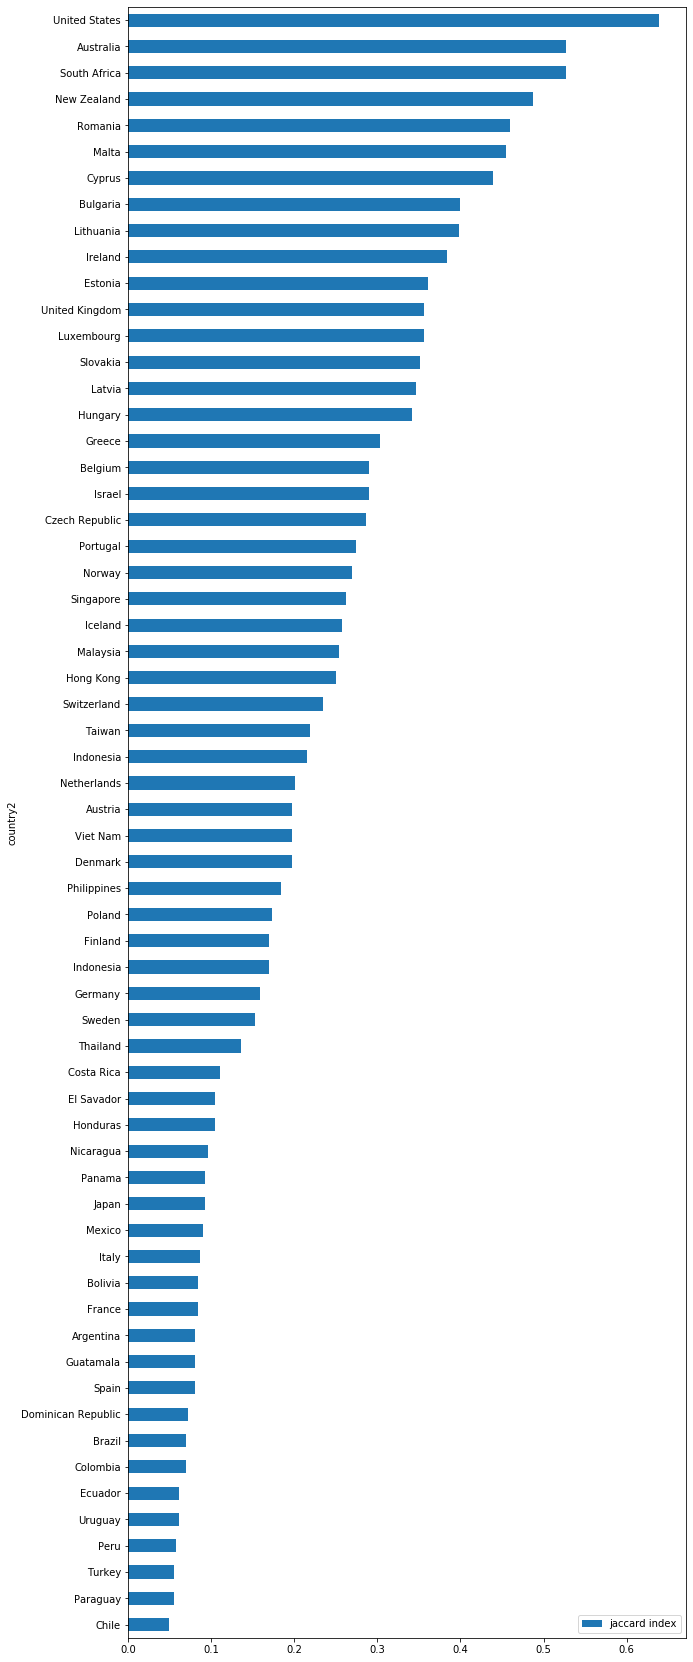

In [406]:
ca_df.sort_values(by=['jaccard index'],ascending=True).plot(x='country2', y='jaccard index', kind='barh', figsize=(10,30))

In [407]:
us_df = df2[df2['country1'] == 'United States']

us_df = us_df[us_df.country2 != 'United States']

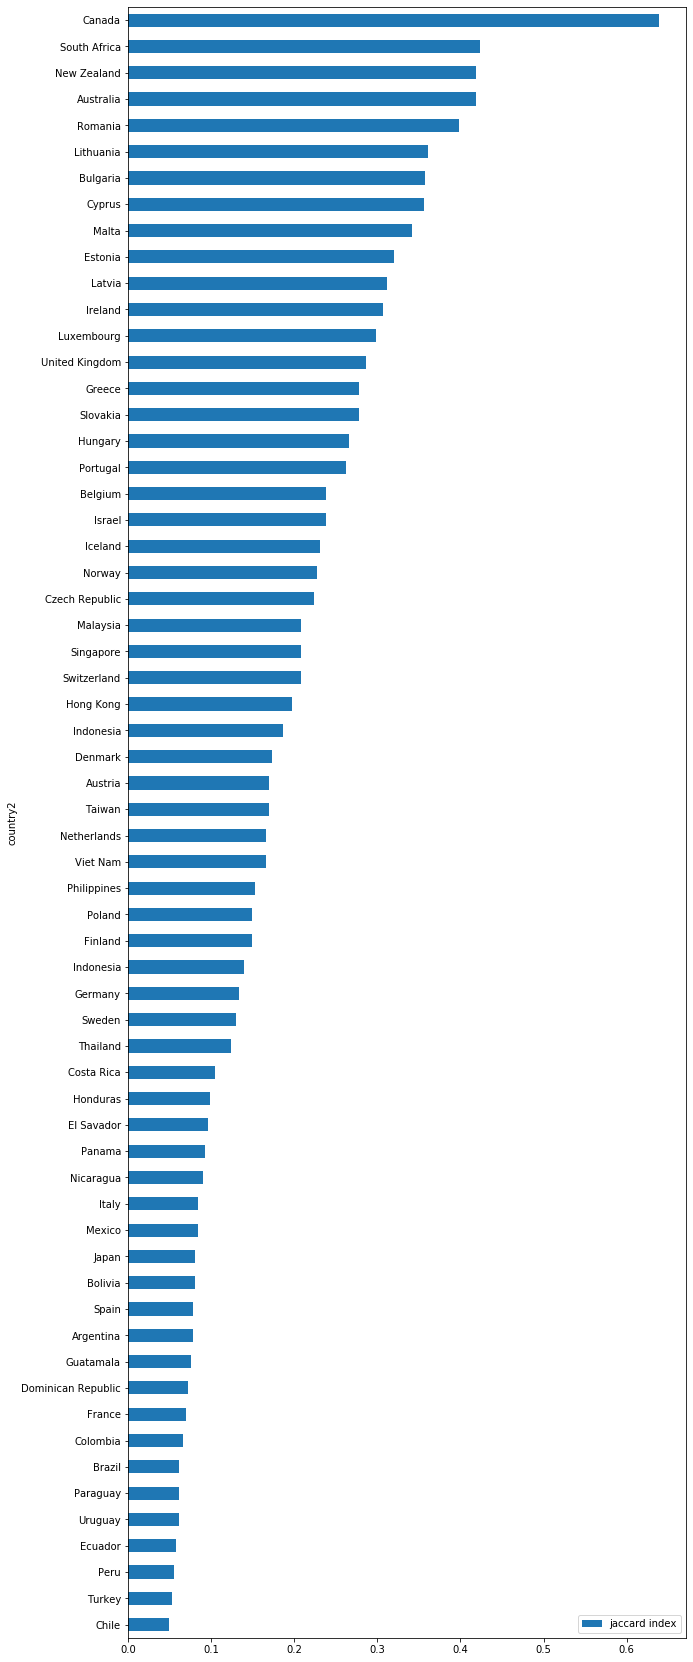

In [408]:
us_df.sort_values(by=['jaccard index'],ascending=True).plot(x='country2', y='jaccard index', kind='barh', figsize=(10,30))

In [ ]:
# Based on my current dataframe, I can compare one country to all other countries, 
# but I can't compare all of the countries to each other (which is what I really want to do.)
# I want my final viz to be a cluster graph, but I'm unsure how to get there.
# Any help and advice is appreciated



